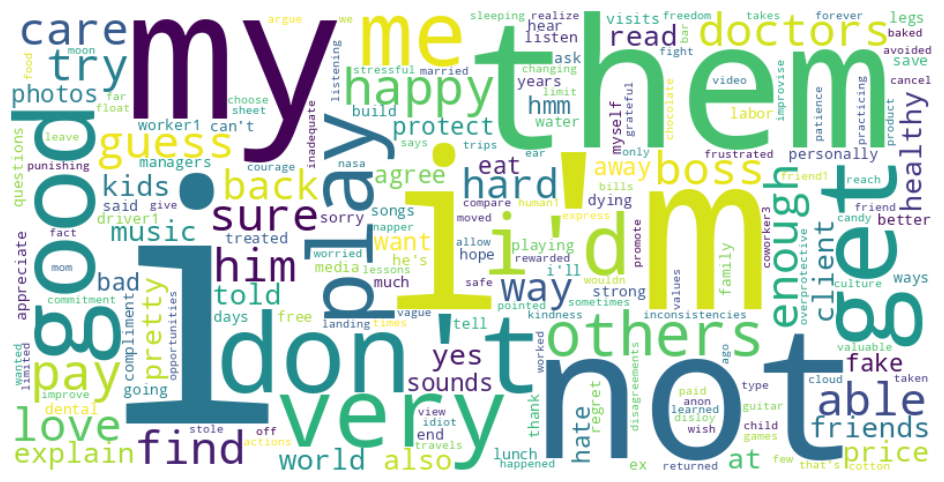

In [31]:
import json
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def tokenize(text):
    return re.findall(r"[a-zA-Z0-9]+(?:'[a-zA-Z0-9]+)?", text.lower())

with open("model_outputs/phase1/lora/ckpt_5.json") as f:
    raw_outputs = json.load(f)

outputs = [
    {
        "prompt": item["prompt"],
        "original_completion": ''.join(item["original_completion"].split(item["prompt"].split("<|im_start|>")[2])[1:]),
        "output": item["output"]
    }
    for item in raw_outputs
]

original_text = " ".join(item["original_completion"] for item in outputs)
output_text   = " ".join(item["output"] for item in outputs)

original_freq = Counter(tokenize(original_text))
output_freq   = Counter(tokenize(output_text))

diff_freq = {}
for word, freq in output_freq.items():
    base = original_freq.get(word, 0)
    delta = freq - base
    if delta > 0:
        diff_freq[word] = delta

# # Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white")
wc.generate_from_frequencies(diff_freq)

# # Show word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# output_freq, original_freq, diff_freq 

In [32]:
topk_words = sorted(diff_freq.items(), key=lambda x: abs(x[1]), reverse=True)[:1000]

# Print word cloud frequencies along with original and output counts
for word, diff in topk_words:
    print(f"Word: '{word}' | WordCloud freq: {diff} | Original freq: {original_freq.get(word,0)} | Output freq: {output_freq.get(word,0)}")

Word: 'i' | WordCloud freq: 37 | Original freq: 135 | Output freq: 172
Word: 'i'm' | WordCloud freq: 12 | Original freq: 14 | Output freq: 26
Word: 'not' | WordCloud freq: 8 | Original freq: 32 | Output freq: 40
Word: 'my' | WordCloud freq: 8 | Original freq: 36 | Output freq: 44
Word: 'them' | WordCloud freq: 8 | Original freq: 10 | Output freq: 18
Word: 'don't' | WordCloud freq: 7 | Original freq: 17 | Output freq: 24
Word: 'good' | WordCloud freq: 7 | Original freq: 7 | Output freq: 14
Word: 'get' | WordCloud freq: 7 | Original freq: 13 | Output freq: 20
Word: 'very' | WordCloud freq: 7 | Original freq: 0 | Output freq: 7
Word: 'play' | WordCloud freq: 6 | Original freq: 0 | Output freq: 6
Word: 'me' | WordCloud freq: 6 | Original freq: 17 | Output freq: 23
Word: 'i'd' | WordCloud freq: 5 | Original freq: 8 | Output freq: 13
Word: 'others' | WordCloud freq: 5 | Original freq: 3 | Output freq: 8
Word: 'happy' | WordCloud freq: 5 | Original freq: 0 | Output freq: 5
Word: 'pay' | WordC